### matplotlib에 한글폰트 적용하기
- 링크 : http://corazzon.github.io/matplotlib_font_setting

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([  78,  163,  185,  102,  122,  194,  286,  332,  384,  302,  246,
        219,  294,  277,  276,  185,  234,  175,   87,   22,   32,  113,
         46,  -25,   11,  -19,  -54,  -76, -107,  -27,   60,  109,   79,
         84,   59,   98,  121,   64,   29,  -28,   -9,  -70,  -42,  -78,
       -177, -207, -264, -223, -175, -117])

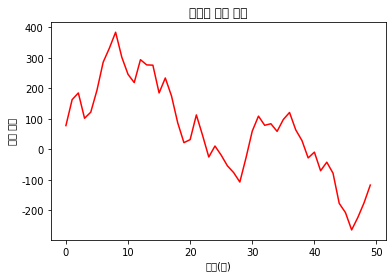

In [4]:
# 기본 폰트에서는 한글 폰트가 깨져서 나옴
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)');

In [5]:
# 설치된 matplotlib의 버전과 위치정보 가져옴
print('버전:', mpl.__version__)
print('설치 위치:', mpl.__file__)
print('설정 위치:', mpl.get_configdir())
print('캐시 위치:', mpl.get_cachedir())

버전: 3.1.3
설치 위치: /home/jone/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치: /home/jone/.config/matplotlib
캐시 위치: /home/jone/.cache/matplotlib


In [6]:
print('설정 파일 위치:', mpl.matplotlib_fname())

설정 파일 위치: /home/jone/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [7]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체 갯수
print(len(font_list))

45


In [8]:
print(font_list)

['/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/NanumFont/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/NanumFont/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/NanumFont/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/u

In [9]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

45


['NanumBarunGothic',
 'NanumSquare',
 'cmb10',
 'STIXSizeThreeSym',
 'cmsy10',
 'NanumGothic Eco',
 'STIXSizeOneSym',
 'NanumSquareRound',
 'NanumGothicCoding',
 'NanumGothic']

In [10]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumBarunGothic',
  '/home/jone/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothicLight.ttf'),
 ('NanumSquare',
  '/home/jone/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareEB.ttf'),
 ('NanumGothic Eco',
  '/home/jone/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicEcoBold.ttf'),
 ('NanumSquareRound',
  '/home/jone/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundR.ttf'),
 ('NanumGothicCoding',
  '/home/jone/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicCoding-Bold.ttf'),
 ('NanumGothic',
  '/home/jone/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicLight.ttf'),
 ('NanumMyeongjo',
  '/home/jone/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-p

### 1) FontProperties를 사용하는 방법
- 텍스트를 지정하는 항복에 지정해 사용할 수 있습니다. 지정해 준 항목에만 해당 폰트가 적용 됩니다.

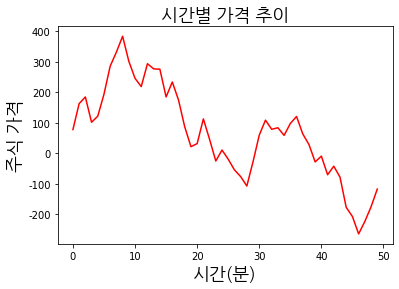

In [11]:
# fname 옵션을 사용하는 방법
path = '/usr/share/fonts/NanumFont/NanumGothic.ttf'
fontdrop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontdrop)
plt.ylabel('주식 가격', fontproperties=fontdrop)
plt.xlabel('시간(분)', fontproperties=fontdrop)
plt.show()

### 2) matplotlib.rcParams[]으로 전역글꼴 설정 방법

In [12]:
# size, family
print('# 설정 되어있는 폰트 사이즈')
print(plt.rcParams['font.size'])
print('# 설정 되어있는 폰트 글꼴')
print(plt.rcParams['font.family'])

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [13]:
# serif, sans-serif, monospace
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace']) 

serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [14]:
plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

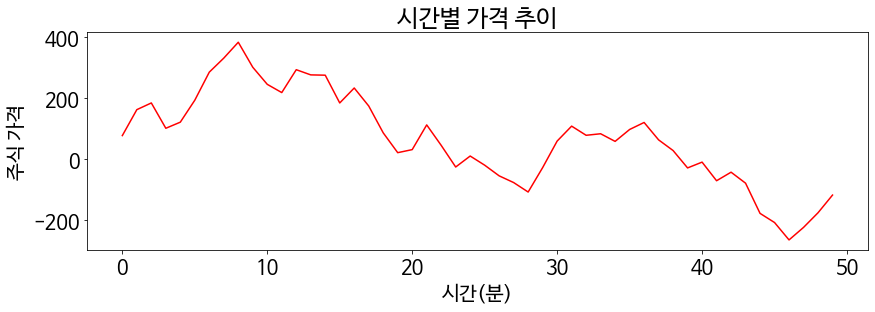

In [15]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### rcParams 대신 FontProperties와 plt.rc를 사용하는 방법

NanumGothic


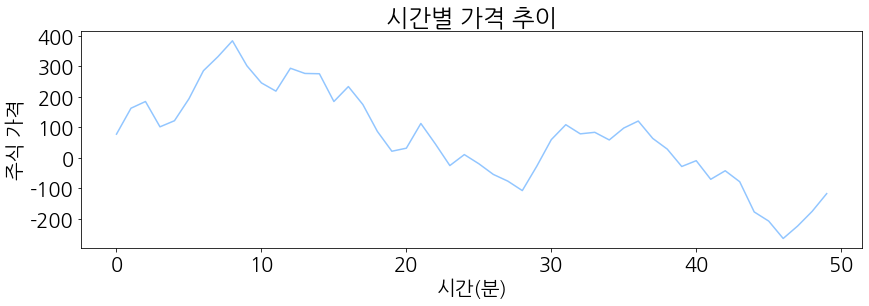

In [16]:
path = '/usr/share/fonts/NanumFont/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('ggplot')
plt.show()